1. Problem identification
2. Business Understanding
3. Collection Data
4. Pre_processing data
5. EDA (Exploratory Data Analysis)
6. Feature Engineering And selection
7. Model training , Evaluation ,selection  
8. Model Testing
  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# First Know our data

In [ ]:
df.shape

(1338, 7)

In our data, there are 7 columns and 1338 rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In our data, there are seven columns (age, sex, bmi, children, smoker, redion, expenses), and the data types of these columns are given above.

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There are no null values in our data.

In [ ]:
df.describe()  # for the descriptive analysis of the dataset

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.corr(method='pearson', min_periods=1, numeric_only=True)

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


# EDA (Exploratory Data Analysis)

In [ ]:
df.corr(method='pearson', min_periods=1, numeric_only=True)

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


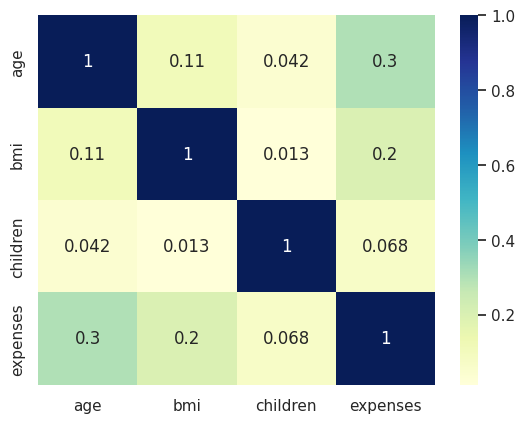

In [ ]:
dataplot = sns.heatmap(df.iloc[:,[0,2,3,6]].corr(), cmap="YlGnBu", annot=True)

<Axes: ylabel='count'>

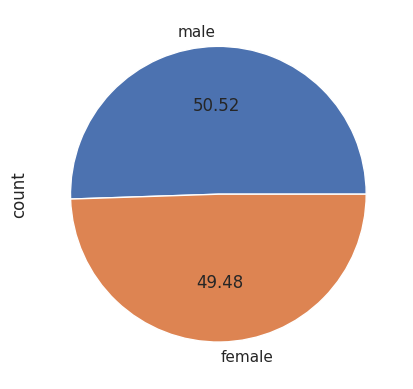

In [ ]:
df['sex'].value_counts().plot(kind = 'pie',autopct='%.2f')

<Axes: ylabel='count'>

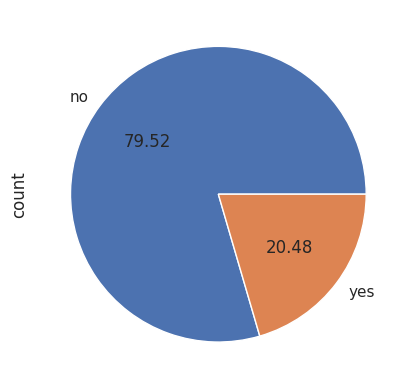

In [ ]:
df['smoker'].value_counts(ascending=False).plot(kind = 'pie',autopct='%.2f')

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

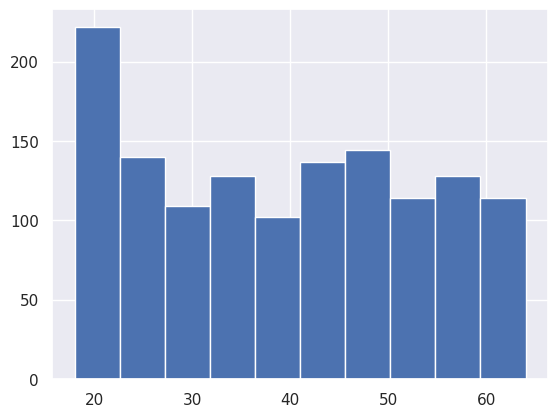

In [ ]:
# histogram of age
df.age.mean()
import matplotlib.pyplot as plt
plt.hist(df["age"],bins = 10)

<ipython-input-9-46db0f070446>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


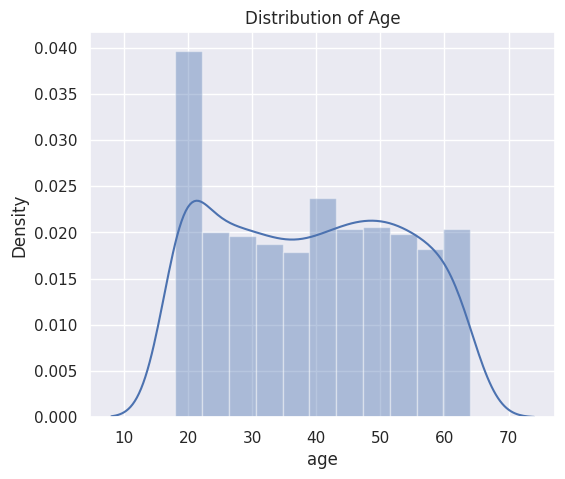

In [ ]:

sns.set()
plt.figure(figsize = (6,5))
sns.distplot(df["age"])
plt.title("Distribution of Age")
plt.show()

<Axes: ylabel='age'>

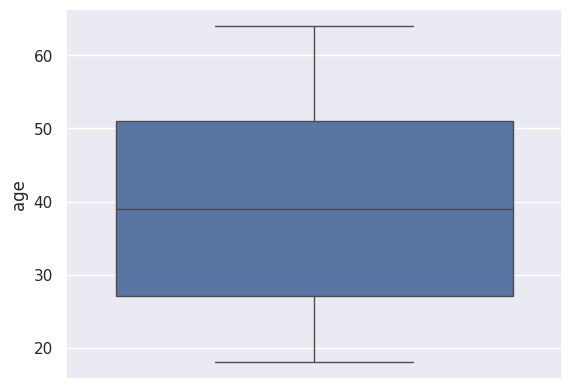

In [ ]:
# Box-plot
sns.boxplot(df['age'])

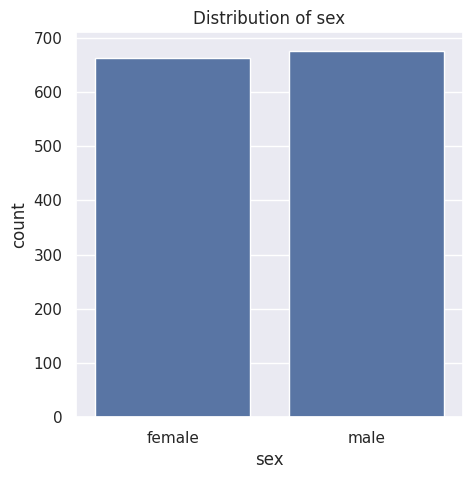

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x='sex',data= df)

plt.title("Distribution of sex")
plt.show()

In [ ]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-12-f860c9dc5637>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


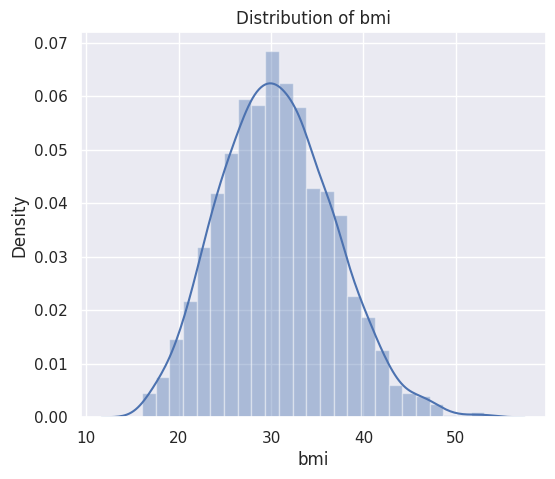

In [ ]:
# for bmi
plt.figure(figsize = (6,5))
sns.distplot(df["bmi"])
plt.title("Distribution of bmi")
plt.show()

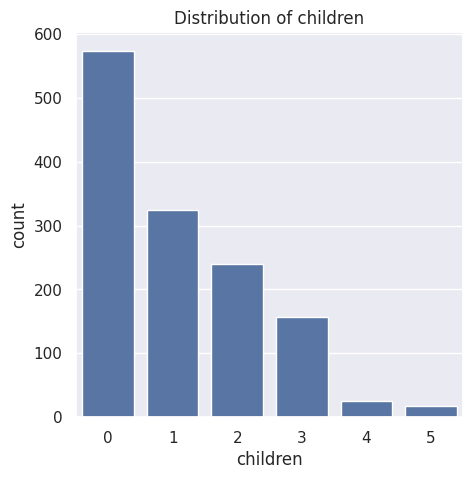

In [ ]:
# for Children column
plt.figure(figsize = (5,5))
sns.countplot(x='children',data= df)

plt.title("Distribution of children")
plt.show()

In [ ]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

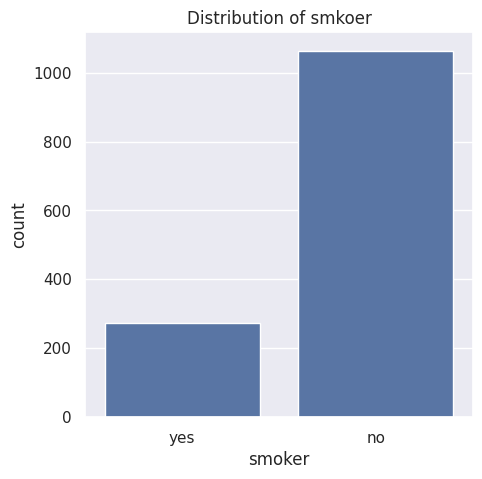

In [ ]:
# for Children column
plt.figure(figsize = (5,5))
sns.countplot(x='smoker',data= df)

plt.title("Distribution of smkoer")
plt.show()

<Axes: xlabel='bmi', ylabel='age'>

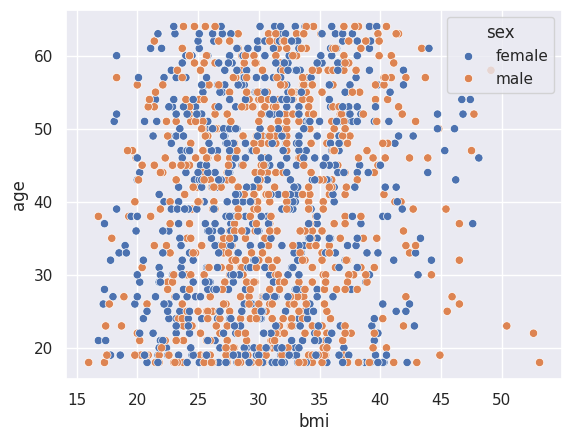

In [ ]:
sns.scatterplot(x=df['bmi'],y=df['age'],hue=df['sex'])

In [ ]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

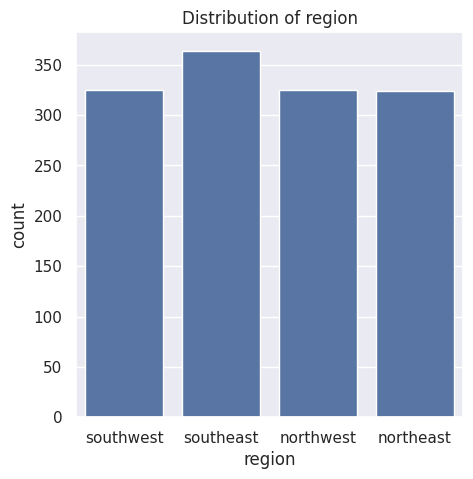

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x='region',data= df)

plt.title("Distribution of region")
plt.show()

In [ ]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-19-87f1b0b3c8b5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'])


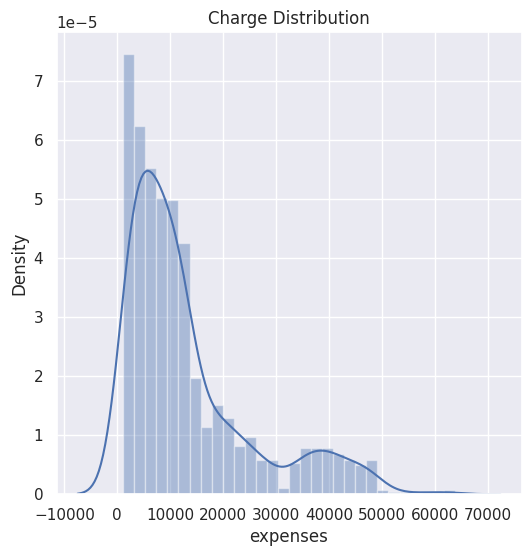

In [ ]:

#distribution of charges values
plt.figure(figsize=(6,6))
sns.distplot(df['expenses'])
plt.title('Charge Distribution')
plt.show()

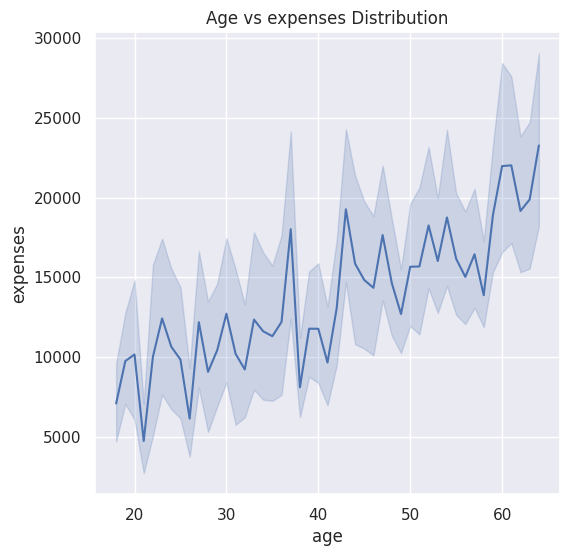

In [ ]:
# Scatterplot for Age and Charges and for BMI and Charges
plt.figure(figsize=(6,6))
sns.lineplot(x='age',y='expenses',data= df)
plt.title('Age vs expenses Distribution')
plt.show()

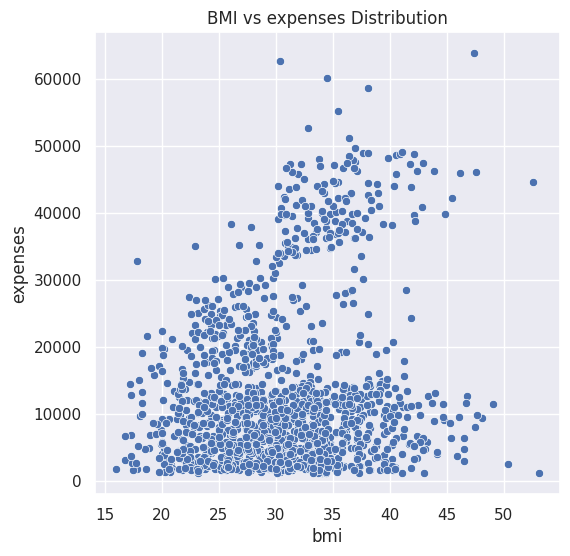

In [ ]:
#Scatterplot for BMI and Charges
plt.figure(figsize=(6,6))
sns.scatterplot(x='bmi',y='expenses',data= df)
plt.title('BMI vs expenses Distribution')
plt.show()

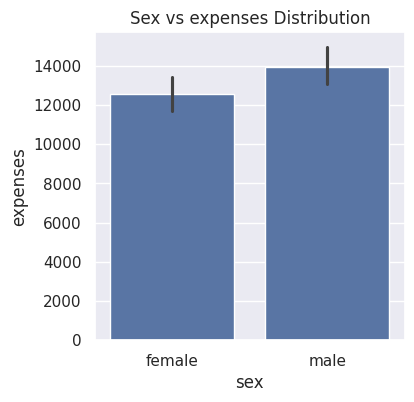

In [ ]:
#Scatterplot for Sex and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='sex',y='expenses',data= df)
plt.title('Sex vs expenses Distribution')
plt.show()

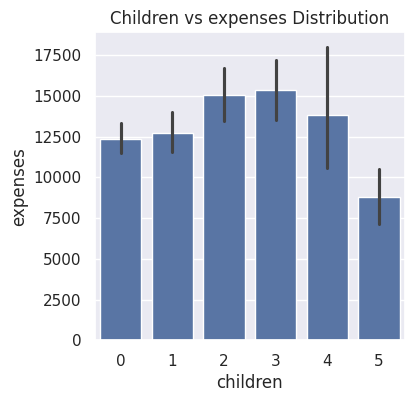

In [ ]:
#Scatterplot for Children and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='children',y='expenses',data= df)
plt.title('Children vs expenses Distribution')
plt.show()

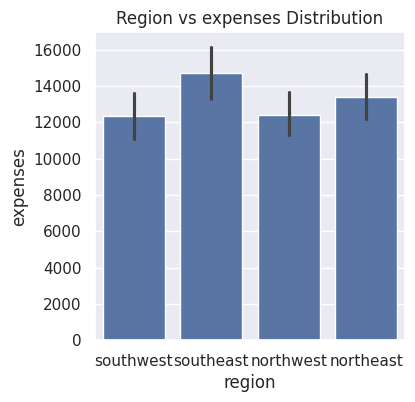

In [ ]:
#Scatterplot for Region and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='region',y='expenses',data= df)
plt.title('Region vs expenses Distribution')
plt.show()

# Spliting the data into train dataset  and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["expenses"]),df["expenses"],test_size = 0.2, random_state= 5)

In [ ]:
X_train.shape , X_test.shape

((1070, 6), (268, 6))

# Feature Engineering And selection

Encoding Categorical data into Numerical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe_sex = OneHotEncoder(sparse=False,handle_unknown="ignore")
ohe_smoker = OneHotEncoder(sparse=False,handle_unknown="ignore")
ohe_region= OneHotEncoder(sparse=False,handle_unknown="ignore")

In [ ]:
X_train_sex = ohe_sex.fit_transform(X_train[['sex']])
X_train_smoker = ohe_smoker.fit_transform(X_train[['smoker']])
X_train_region = ohe_region.fit_transform(X_train[['region']])

X_test_sex = ohe_sex.fit_transform(X_test[['sex']])
X_test_smoker = ohe_smoker.fit_transform(X_test[['smoker']])
X_test_region = ohe_region.fit_transform(X_test[['region']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
X_train_region

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
X_train_rem = X_train.drop(columns=["sex",'smoker','region'])
X_test_rem = X_test.drop(columns=["sex",'smoker','region'])

In [ ]:
X_test_rem

,age,bmi,children
471,18,30.1,0
1250,24,29.8,0
1257,54,27.6,1
139,22,36.0,0
919,35,34.2,1
...,...,...,...
524,42,26.1,1
564,18,32.1,2
35,19,20.4,0
1033,18,21.6,0


In [ ]:
X_train_t = np.concatenate((X_train_rem,X_train_sex,X_train_smoker,X_train_region),axis=1)
X_test_t = np.concatenate((X_test_rem,X_test_sex,X_test_smoker,X_test_region),axis=1)

In [ ]:
X_train_t[0]

array([28. , 37.1,  1. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ])

In [ ]:
df_new = pd.DataFrame(X_train_t,columns=["age","bmi",'children',"sex_male",'sex_female','smoker_no','smoker_yes',"region_northeast",'region_northwest','region_southeast','region_souhtwest'])

In [ ]:
df_new.head()

,age,bmi,children,sex_male,sex_female,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_souhtwest
0,28.0,37.1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,24.0,24.2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,19.0,30.6,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,23.0,24.2,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,18.0,25.1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_train_t

array([[28. , 37.1,  1. , ...,  0. ,  0. ,  1. ],
       [24. , 24.2,  0. , ...,  1. ,  0. ,  0. ],
       [19. , 30.6,  0. , ...,  1. ,  0. ,  0. ],
       ...,
       [33. , 36.3,  3. , ...,  0. ,  0. ,  0. ],
       [59. , 26.4,  0. , ...,  0. ,  1. ,  0. ],
       [57. , 43.7,  1. , ...,  0. ,  0. ,  1. ]])

In [ ]:
y_train

1261     3277.16
816      2842.76
581      1639.56
1328    22395.74
492      2196.47
          ...   
73      11946.63
1142    27117.99
998      6551.75
206     11743.30
867     11576.13
Name: expenses, Length: 1070, dtype: float64

# Model training , Evaluation ,selection

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_t,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_t)

In [ ]:
from sklearn.linear_model import Lasso
las = Lasso(10)

In [ ]:
las.fit(X_train_t,y_train)

Lasso(alpha=10)

In [ ]:
y_pred1 = las.predict(X_test_t)

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge(0.1)
rid.fit(X_train_t,y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred2 = rid.predict(X_test_t)

In [ ]:
print('The R squared value for the testing dataset using Linear Regression is : ',r2_score(y_test,y_pred))
print('The R squared value for the testing dataset using Lasso Regression is  : ',r2_score(y_test,y_pred1))
print('The R squared value for the testing dataset using Ridge regression is   : ',r2_score(y_test,y_pred1))

The R squared value for the testing dataset using Linear Regression is :  0.7781282745920679
The R squared value for the testing dataset using Lasso Regression is  :  0.7781672528351491
The R squared value for the testing dataset using Ridge regression is   :  0.7781672528351491


# Testing phase

In [ ]:
test_input = np.array([31, 'female',25.74, 0, 'no', 'southeast'],dtype=object).reshape(1,6)

In [ ]:
test_input

array([[31, 'female', 25.74, 0, 'no', 'southeast']], dtype=object)

In [ ]:
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
test_input_sex

array([[1., 0.]])

In [ ]:
test_input_smoker = ohe_smoker.transform(test_input[:,4].reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
test_input_smoker

array([[1., 0.]])

In [ ]:
test_input_region = ohe_region.transform(test_input[:,-1].reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
test_input_region

array([[0., 0., 1., 0.]])

In [ ]:
test_input_transformed = np.concatenate((test_input[:,[0,2,3]],test_input_sex,test_input_smoker,test_input_region),axis=1)

In [ ]:
test_input_transformed.shape

(1, 11)

In [ ]:
t = lr.predict(test_input_transformed)

In [ ]:
print("Test_data output using Linear Regression is",t)

Test_data output using Linear Regression is [3817.84597293]


In [ ]:
from sklearn.linear_model import Lasso
las = Lasso(10)

In [ ]:
las.fit(X_train_t,y_train)

Lasso(alpha=10)

In [ ]:
y_pred1 = las.predict(X_test_t)

In [ ]:
r2_score(y_test,y_pred1)

0.7781672528351491

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge(0.1)

In [ ]:
rid.fit(X_train_t,y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred2 = rid.predict(X_test_t)

In [ ]:
r2_score(y_test,y_pred2)

0.7781148676182699

In [ ]:
input_data= (31,"female",25.74,0,'no','souheast')

In [ ]:
test_input = np.array(input_data,dtype=object).reshape(1,-1)

In [ ]:
test_input

array([[31, 1, 25.74, 0, 1, 0]], dtype=object)